# Deep Learning A Z Deep Autoencoder

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import InputLayer, Input, Dense

In [5]:
(X_treinamento, _), (X_teste, _) = mnist.load_data()
X_treinamento = X_treinamento.astype('float32') / 255
X_teste = X_teste.astype('float32') / 255
X_treinamento = X_treinamento.reshape((len(X_treinamento), np.prod(X_treinamento.shape[1:])))
X_teste = X_teste.reshape((len(X_teste), np.prod(X_teste.shape[1:])))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# 784 -> 128 -> 64 -> 32 -> 64 -> 128 -> 784
autoencoder = Sequential()

# Codificador
autoencoder.add(InputLayer(shape=(784,)))
autoencoder.add(Dense(units = 128, activation='relu'))
autoencoder.add(Dense(units = 64, activation='relu'))
autoencoder.add(Dense(units = 32, activation='relu'))

# Decodificador
autoencoder.add(Dense(units = 64, activation='relu'))
autoencoder.add(Dense(units = 128, activation='relu'))
autoencoder.add(Dense(units = 784, activation='sigmoid'))

autoencoder.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 784)                 │         101,136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
historico = autoencoder.fit(X_treinamento, X_treinamento, epochs=50, batch_size=256, validation_data=(X_teste, X_teste))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.0100 - loss: 0.3473 - val_accuracy: 0.0116 - val_loss: 0.1685
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.0125 - loss: 0.1579 - val_accuracy: 0.0124 - val_loss: 0.1364
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.0110 - loss: 0.1346 - val_accuracy: 0.0100 - val_loss: 0.1241
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.0093 - loss: 0.1236 - val_accuracy: 0.0106 - val_loss: 0.1172
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.0101 - loss: 0.1172 - val_accuracy: 0.0111 - val_loss: 0.1131
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.0109 - loss: 0.1135 - val_accuracy: 0.0118 - val_loss: 0.1090
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.0104 - loss: 0.1097 - val_accuracy: 0.0099 - val_loss: 0.1068
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.0110 - loss: 0.1070 - val_accu

In [25]:
# 784 -> 128 -> 64 -> 32
dimensao_original = Input(shape=(784,))
camada_encoder1 = autoencoder.layers[0]
camada_encoder2 = autoencoder.layers[1]
camada_encoder3 = autoencoder.layers[2]
encoder = Model(dimensao_original, camada_encoder3(camada_encoder2(camada_encoder1(dimensao_original))))
encoder.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 110,816 (432.88 KB)

 Trainable params: 110,816 (432.88 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
imagens_codificadas = encoder.predict(X_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [27]:
imagens_codificadas.shape

(10000, 32)

In [28]:
imagens_decodificadas = autoencoder.predict(X_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [29]:
imagens_decodificadas.shape

(10000, 784)

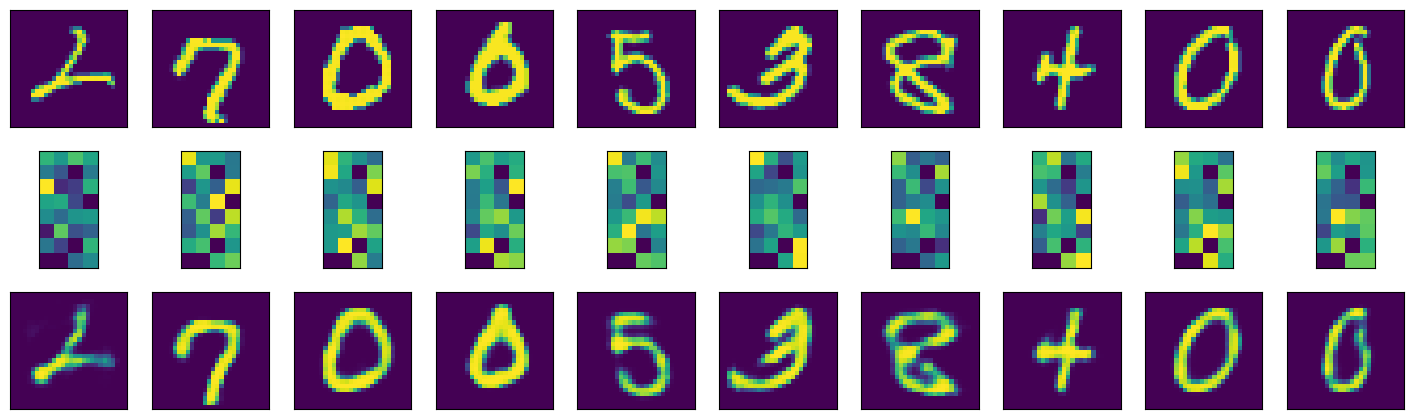

In [30]:
numero_imagens = 10
imagens_teste = np.random.randint(X_teste.shape[0], size=numero_imagens)
plt.figure(figsize=(18,18))
for i, indice_imagem in enumerate(imagens_teste):
    # imagem original
    eixo = plt.subplot(10, 10, i + 1)
    plt.imshow(X_teste[indice_imagem].reshape(28, 28))
    plt.xticks(())
    plt.yticks(())

    # imagem codificada
    eixo = plt.subplot(10, 10, i + 1 + numero_imagens)
    plt.imshow(imagens_codificadas[indice_imagem].reshape(8, 4))
    plt.xticks(())
    plt.yticks(())

    # imagem reconstruída
    eixo = plt.subplot(10, 10, i + 1 + numero_imagens * 2)
    plt.imshow(imagens_decodificadas[indice_imagem].reshape(28, 28))
    plt.xticks(())
    plt.yticks(())
